# Más sobre listas y matrices

En el primer cuatrimestre se han visto distintas estructuras de datos como booleanos, enteros, reales (números en coma flotante), cadenas de texto, tuplas y listas. De todos ellos, las listas tienen una característica particular, que son *mutables*.

## Mutabilidad

En Python, la relación entre nombres y objetos que designan no es necesariamente inyectiva, como en la vida misma. Por ejemplo, las frases «Pedro Almodóvar», «el director de *Todo sobre mi madre*» y «el ganador del Óscar a mejor película de habla no inglesa en 1999» designan a la misma persona. Con objetos inmutables esto no es problemático, porque el referente nunca cambia de valor, pero es posible cometer errores si no se tiene suficiente cuidado cuando hay mutabilidad.

In [1]:
mi_lista = [[1, 2], 3]
mi_otra_lista = mi_lista

In [2]:
mi_otra_lista[1] = 4
mi_lista

[[1, 2], 4]

Tanto `mi_lista` como `mi_otra_lista` apuntan al mismo objeto en memoria. Esto se puede comprobar con la función `id` que devuelve un identificador único (típicamente su ubicación en la memoria del ordenador) para cada objeto.

In [3]:
id(mi_lista), id(mi_otra_lista)

(139818655106368, 139818655106368)

Si verdaderamente queremos que `mi_otra_lista` sea otra lista independiente, hemos de copiar explícitamente el objeto.

In [4]:
mi_otra_lista = mi_lista.copy()  # o mi_lista[:]
id(mi_lista), id(mi_otra_lista)

(139818655106368, 139818655112384)

In [5]:
mi_otra_lista.append(5)
mi_lista

[[1, 2], 4]

Sin embargo, esto no es suficiente en presencia de objetos mutables anidados, como en este caso. La copia de `mi_lista.copy()` es superficial y no copia a su vez los elementos de la lista.

In [6]:
mi_otra_lista[0].append(3)
mi_lista

[[1, 2, 3], 4]

Cuando sea necesario, para hacer copias profundas de los objetos, podemos utilizar la función `deepcopy` del paquete estándar `copy` de Python.

In [7]:
import copy

mi_lista = [[1, 2], 3]
mi_otra_lista = copy.deepcopy(mi_lista)
mi_otra_lista[0].append(4)

mi_lista

[[1, 2], 3]

In [8]:
id(mi_lista[0]), id(mi_otra_lista[0])

(139818655105216, 139818655114176)

In [9]:
id(mi_lista[1]) == id(mi_otra_lista[1])  # los literales no los copia porque son inmutables (curiosidad)

True

En este cuatrimestre veremos más objetos mutables además de las listas.

## Listas intensionales

En matemáticas es muy frecuente definir conjuntos de forma *intensional* o *por compresión*, es decir, proporcionando una fórmula que describe o genera sus elementos. Por ejemplo, los números naturales entre 0 y 100 como $\{ n \in \mathbb{N} : 0 \leq n \leq 100 \}$ o el grafo de una parábola como $\{(x, x^2) : x \in \mathbb{R} \}$.

Python dispone de una notación específica `[expresión for variable in valores]` para definir así listas y otros tipos de datos básicos. La expresión anterior es equivalente a `lista` tras esta operación
```python
lista = []

for variable in valores:
    lista.append(expresión)
```
pero en forma más breve y concisa. Esta construcción es *azúcar sintáctico*, no permite hacer nada nuevo, solo hacerlo más cómodamente.

In [10]:
[(x, x ** 2) for x in range(-3, 4)]  # parábola anterior entre -3 y 3

[(-3, 9), (-2, 4), (-1, 1), (0, 0), (1, 1), (2, 4), (3, 9)]

La definición intensional también puede incluir una condición.

In [11]:
[x for x in range(12) if x % 3 == 0]  # múltiplos de 3 menores que 12

[0, 3, 6, 9]

Incluso es posible recorrer varias variables. La lista siguiente describe el conjunto $\{(x, y) \in \mathbb{Z}^2 : 1 \leq x \leq 3 \wedge 0 \leq y < x  \}$.

In [12]:
[(x, y) for x in (1, 2, 3) for y in range(0, x)]

[(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]

Veremos una generalización de esto al final de este tema.

## Matrices

Las matrices se representan en Python simplemente como listas de listas. Por ejemplo, la matriz

$$A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}$$

se representa por columnas como

In [13]:
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

La ventaja de esta representación es que `A[i][j]` permite obtener el elemento $a_{ij}$ en la notación habitual del álgebra lineal. La mayor parte de programas de álgebra matricial (por ejemplo, Matlab, que veréis seguramente en la asignatura Métodos Numéricos) utilizan este convenio de índices, al margen de que la representación interna sea distinta.

Por supuesto, no hay problema en representar las matrices como listas de columnas o incluso como listas planas acompañadas de información sobre su orden.

In [14]:
B = ([1, 2, 3, 4, 5, 6, 7, 8, 9], 3) # 3 columnas
B[0][1 * B[1] + 2]  # b_12 -- B[1] es el número de columnas (que hay que saltar)

6

Se puede ver `B` como una matriz simplemente cambiando de fila mentalmente cada 3 elementos. Esta representación hace un uso más eficiente de la memoria y es la habitualmente utilizada internamente por los sistemas de álgebra matricial. Es el caso de [NumPy](https://numpy.org/), una célebre biblioteca para trabajar de forma eficiente con matrices en Python, que no usaremos en este curso.

Con la representación que utilizaremos en la asignatura, el orden de una matriz (es decir, su número de filas y columnas) se puede calcular así:

In [15]:
def orden(A):
    """Orden de una matriz"""
    return len(A), len(A[0])

**Ejemplo 1 (suma de matrices):** podemos programar fácilmente la suma de matrices construyendo la matriz suma $s_{ij} = a_{ij} + b_{ij}$ de arriba a bajo y de izquierda a derecha:

In [16]:
def suma_matrices(A, B):
    if orden(A) != orden(B):
        return None  # error, no se puede hacer la suma
    
    alto, ancho = orden(A)
    suma = []  # futura matriz donde iremos añadiendo filas
    
    for i in range(alto):
        fila = []  # futura fila i de la suma

        for j in range(ancho):
            fila.append(A[i][j] + B[i][j])  # s_ij

        suma.append(fila)
    
    return suma

In [17]:
suma_matrices(A, A)

[[2, 4, 6], [8, 10, 12], [14, 16, 18]]

Pero también podemos programar la suma de forma más compacta usando las listas intensionales que acabamos de ver.

In [18]:
def suma_matrices2(A, B):
    if orden(A) != orden(B):
        return None  # error, no se puede hacer la suma
    
    ancho, alto = orden(A)
    return [[A[i][j] + B[i][j] for j in range(ancho)] for i in range(alto)]

In [19]:
suma_matrices2(A, A)

[[2, 4, 6], [8, 10, 12], [14, 16, 18]]

In [20]:
suma_matrices2(A, [[1] * 3] * 3)

[[2, 3, 4], [5, 6, 7], [8, 9, 10]]

*Observación:* la matriz `[[1] * 3] * 3` no está bien definida, no permite cambiar independientemente cualquiera de sus elementos por la compartición de memoria vista al principio del tema.

In [21]:
B = [[1] * 3] * 3  # pone tres copias seguidas de la misma fila de unos
B

[[1, 1, 1], [1, 1, 1], [1, 1, 1]]

In [22]:
B[0][0] = 2  # al modificar la primera fila cambian las demás
B

[[2, 1, 1], [2, 1, 1], [2, 1, 1]]

**Ejemplo 2 (imágenes):** las imágenes son matrices de números que indican la intensidad de los distintos colores en cada posición. Ciertas operaciones sobre imágenes son simples operaciones sobre matrices como las que sabemos hacer. Lo que no sabemos es cómo pasar de un archivo de imagen a una matriz de números, pero para ello utilizaremos como una caja negra la interesante biblioteca [Matplotlib](https://matplotlib.org/).

In [23]:
import matplotlib.pyplot as plt  # paquete para representación gráfica

El siguiente código devuelve en `img` una matriz a partir del archivo de imagen cuya dirección hemos indicado (es una fotografía de [Alan Turing](https://es.wikipedia.org/wiki/Alan_Turing), 1912-1954, matemático inglés pionero de la informática moderna).

In [24]:
img = plt.imread('img/turing.jpg').tolist()  # lee la imagen como una lista

In [25]:
orden(img)  # es una imagen de este tamaño

(328, 340)

En las imágenes en *escala de grises*, cada píxel es un valor numérico que indica la intensidad de la luz en ese pequeño rectángulo, entre un valor mínimo 0 (negro) y un valor máximo $M$ (blanco). Si se utiliza un byte para almacenar la intensidad de cada píxel, como en la imagen que acabamos de cargar, los valores de la matriz serán números del 0 al 255 ($2^8 - 1$, 8 bits).

In [26]:
# mínimo y máximo de todos los valores
min([min(fila) for fila in img]), max([max(fila) for fila in img])

(0, 255)

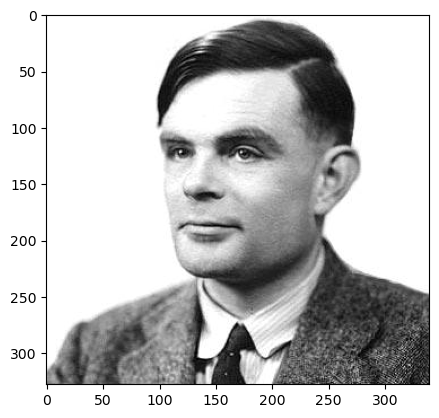

In [27]:
plt.imshow(img, cmap='gray')  # muestra la imagen

Queremos pixelar la imagen para que el archivo ocupe menos memoria o para ocultar algunos detalles. Lo podemos conseguir dividiendo la imagen en cuadrantes y produciendo una matriz nueva donde el valor de cada píxel sea la media del respectivo cuadrante. Primero veamos como calcular la media, que en el caso de un vector es muy sencilla.

In [28]:
def media_vector(vector):
    """Media de un vector"""
    
    suma = 0
    
    for elem in vector:
        suma += elem
        
    return suma // len(vector)

La media de un rectángulo dentro de una matriz no es más compleja, solo hay que recorrer los elementos de ese rectángulo.

In [29]:
def media(matriz, y0, y, x0, x):
    """Media de la matriz en el rectángulo [x0, x) × [y0, y)"""
    
    suma = 0
    
    for i in range(y0, y):  # filas
        for j in range(x0, x):  # columnas
            suma += matriz[i][j]
    
    return suma // ((x - x0) * (y - y0))

Para obtener la imagen pixelada, ahora hay que recorrer la imagen saltando de bloque en bloque y calculando la media de cada rectángulo. Eso es fácil con la variante `range(inicio, fin, paso)` de `range`. El paso será el `lado` de los cuadrados que queremos colapsar a un solo valor.

In [30]:
def pixelar(img, lado=10):  # valor por defecto 10
    """Pixela una imagen"""
    
    # Alto y ancho de la imagen original
    alto, ancho = orden(img)

    return [[media(img, i, min(i + lado, alto),
                        j, min(j + lado, ancho))
             for j in range(0, ancho, lado)]
            for i in range(0, alto, lado)]

La única dificultad es que las dimensiones de la matriz `img` no son necesariamente múltiplos de `lado`, así que algún cuadrado pudiera salirse parcialmente de la imagen. Una solución es truncar esos cuadrados extremos, tomando como límite superior del rectángulo el mínimo entre `j + lado` y el `ancho` de la matriz (lo mismo con `alto`).

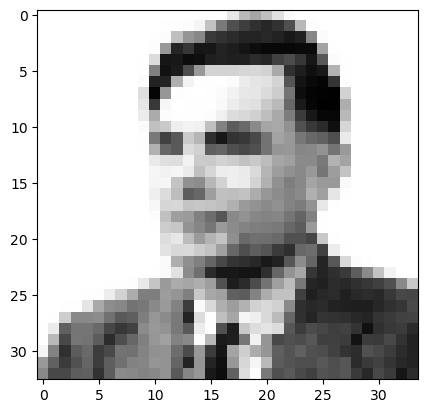

In [31]:
pixelada = pixelar(img)
plt.imshow(pixelada, cmap='gray')

## [Extra] Iteradores (o lo que hay detrás del for)

Un *iterador* es un cursor que permite recorrer secuencialmente una estructura o flujo de datos, avanzando paso a paso. Es una abstracción muy utilizada en los lenguajes de programación modernos, si bien se introdujo por primera vez en el lenguaje [CLU](https://es.wikipedia.org/wiki/CLU) en 1974. En Python, es un objeto opaco con una única operación `next` que permite obtener el valor al que apunta y pasar a apuntar al siguiente elemento.

![](img/iterador.svg)

Un objeto *iterable* es aquel que tiene definido un iterador. Son iterables las secuencias (tuplas, listas, cadenas), la función `range` y muchos otros tipos de datos en Python. Los objetos iterables devuelven un iterador con la función predefinida `iter`.

In [32]:
it = iter([1, 2])
it

Por ejemplo, en una lista, el iterador devolverá los elementos de la lista uno a uno.

In [33]:
next(it)

1

In [34]:
next(it)

2

In [35]:
next(it)

StopIteration: 

Si se aplica `next` al iterador cuando no quedan más elementos se produce un error. El bucle `for` captura ese error para saber cuando terminar. Alternativamente, se le puede pasar un argumento adicional a `next` como valor por defecto, que devolverá al final de la iteración en lugar de producir el error.

In [36]:
next(it, -1)  # admite un valor por defecto

-1

Sin embargo, las funciones `iter` y `next` no se suelen utilizar explícitamente en la práctica, sino a través de instrucciones más abstractas como el bucle `for`, las listas intensionales y otras construcciones semejantes.

In [37]:
total = 0

for n in (34, 42, 74, 54):
    total += n * n
    
total

11312

Internamente, el bucle (1) llama a `iter` sobre el resultado de la expresión a la derecha de `in` para obtener un iterador, (2) en cada iteración llama a `next` sobre el iterador para obtener el elemento que asigna a la variable del bucle, y (3) cuando `next` indica que no hay más elementos (`StopIteration`) termina. Lo mismo ocurre en las listas intensionales.

In [38]:
[n * n for n in (34, 42, 74, 54)]

[1156, 1764, 5476, 2916]

La expresión que aparece entre corchetes en las listas intensionales tiene sentido propio y se denomina *expresión generadora*. Es un iterador que devuelve sucesivamente los elementos que aparecen en la lista anterior, sin crearla. La generación de los elementos es perezosa, no ocurre hasta que no se llama al `next` correspondiente.

In [39]:
(n * n for n in (34, 42, 74, 54))

<generator object <genexpr> at 0x7fe1ad4fc5f0>

Por ejemplo, se puede producir una tupla en lugar de una lista a partir de ese iterador.

In [40]:
tuple(n * n for n in (34, 42, 74, 54))

(1156, 1764, 5476, 2916)

O sumar directamente sus elementos sin almacenarlos en una estructura con la función predefinida `sum`.

In [41]:
sum(n * n for n in (34, 42, 74, 54))  # suma

11312

*Observación 1*: habitualmente los iteradores son también objetos iterables con ellos mismos como sus propios iteradores. Esta propiedad resulta ventajosa, pues permite utilizador iteradores también en los bucles `for`.

In [42]:
it = iter([1, 2])
iter(it) == it

True

En particular, las expresiones generadoras son a la vez iteradores e iterables.

In [43]:
gen = (n * n for n in (34, 42, 74, 54))
iter(gen) == gen

True

*Observación 2*: el funcionamiento de `tuple` y `sum` respecto al iterable es el mismo que el del bucle `for`, llamará a `iter` y luego sucesivamente a `next` para obtener los elementos. Esto y el carácter perezoso de las expresiones generadoras lo podemos ver con el siguiente ejemplo:

In [44]:
gen = (print(f'next por {n}-ésima vez') for n in range(3))

La expresión que define `gen` es una llamada a la función `print` que simplemente imprime un texto. Véase que la expresión no se ha evaluado porque no ha aparecido nada impreso.

In [45]:
next(gen)  # evalúa solo el primer elemento

next por 0-ésima vez


In [46]:
tuple(gen)  # evalúa todos los elementos mientras construye la tupla

next por 1-ésima vez
next por 2-ésima vez


(None, None)

*Observación 3*: existen otros métodos para que los usuarios de Python puedan definir sus propios iteradores y objetos iterables, que no veremos durante el curso.

### Funciones predefinidas sobre iteradores

Además de `sum`, Python proporciona otras funciones predefinidas que operan con iteradores. No es necesario conocerlas y lo importante en poderlas programar con las instrucciones básicas, pero se muestran a continuación algunas de ellas como referencia.

* Mínimo y máximo de los elementos de un iterable. Ha de haber un orden definido sobre ellos (números, cadenas, etc).

In [47]:
min((34, 42, 74, 54))  # mínimo

34

In [48]:
max((34, 42, 74, 54))  # máximo

74

* Conjunción y disyunción lógicas de los elementos de un iterador de booleanos o asimilables. En Python y en muchos otros lenguajes, todos los objetos se pueden interpretar como valores lógicos (los números son *ciertos* si no son nulos, las cadenas, listas y tuplas si no son vacías, `None` es siempre falso, etc).

In [49]:
all([True, 2, False])  # conjunción (y lógica)

False

In [50]:
any((True, 'dos', False))  # disyunción (o lógica)

True

Mientras que las funciones anteriores calculaban un resultado escalar a partir de los elementos del iterador, hay otra clase de ellas que generan una secuencia nueva de elementos. Por ejemplo, `enumerate` itera sobre pares $(k, e)$ done $e$ es un elemento del iterador original y $k$ es su índice o número de orden consecutivo.

In [51]:
enumerate('abcde')  # devuelve un iterador

In [52]:
list(_)  # _ representa la salida de la celda anterior

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e')]

In [53]:
# Eleva los elementos de la lista al cuadrado
mi_lista = [34, 42, 74, 54]

for k, v in enumerate(mi_lista):
    mi_lista[k] = v * v  # se ahorra un poco de escritura

mi_lista

[1156, 1764, 5476, 2916]

Otra función semejante es `reversed`: el iterador que devuelve suministra los elementos en el orden opuesto.

In [54]:
''.join(reversed('amar'))

'rama'

Las siguientes funciones reciben una función además del iterador, bien para filtrar o bien para modificar los elementos.

In [55]:
def es_primo(n: int) -> bool:
    for d in range(2, int(n ** 0.5) + 1):
        if n % d == 0:
            return False
    return True

* `map` aplica una función a los elementos de un iterable. El resultado es un iterador sobre las imágenes de todos ellos.

In [56]:
tuple(map(es_primo, range(2, 12)))

(True, True, False, True, False, True, False, False, False, True)

* `filter` devuelve un iterador sobre los elementos del iterador original que cumplen un predicado (*filtro*). Un predicado no es más que una función que toma valores booleanos o asimilables. Por ejemplo, el bucle siguiente recorre exclusivamente los números primos entre 2 y 29.

In [57]:
for p in filter(es_primo, range(2, 30)):
    print(p, end=' ')

2 3 5 7 11 13 17 19 23 29 

* `zip` recibe cero o más iteradores como argumento y devuelve un iterador sobre las tuplas que combinan sus valores secuencialmente (como una *cremallera*). Es decir, el elemento $k$-ésimo de $\mathrm{map}(z_1, \ldots, z_n)$ es la tupla $(z_{1,k}, \ldots, z_{n,k})$ donde $z_{j,k}$ es el elemento $k$-ésimo del iterador $z_j$. La secuencia se acaba cuando se acaba el primer iterador.

In [58]:
for tupla in  zip((1, 2, 3), ('uno', 'dos')):
    print(tupla, end=' ')

(1, 'uno') (2, 'dos') 

Además, el paquete estándar [`itertools`](https://docs.python.org/3/library/itertools.html?highlight=itertools#module-itertools) proporciona numerosas funciones para generar, transformar y operar con iteradores.

## Referencias

* §5 «Structured Types and Mutability» del [libro de Guttag](https://ucm.on.worldcat.org/oclc/1347116367) (§5 en la [edición de 2013](https://ucm.on.worldcat.org/oclc/1025935018)).
* [§5.1.3 «Compresión de listas»](https://docs.python.org/es/3/tutorial/datastructures.html#list-comprehensions), [§5.1.4 «Listas por comprensión anidadas»](https://docs.python.org/es/3/tutorial/datastructures.html#nested-list-comprehensions), [§9.8 «Iteradores»](https://docs.python.org/es/3/tutorial/classes.html#iterators) y [§9.10 «Expresiones generadoras»](https://docs.python.org/es/3/tutorial/classes.html#generator-expressions) del tutorial de Python.